In [1]:
import mne 
import pickle
import argparse
import numpy as np
import os


from src.params import SUBJ_CLEAN, RESULT_PATH, ACTIVE_RUN, PASSIVE_RUN, FIG_PATH, FREQS_LIST, PREPROC_PATH, FREQS_NAMES
from src.utils import get_bids_file

from matplotlib.backends.backend_pdf import PdfPages 
import matplotlib
import matplotlib.pyplot as plt



In [6]:
def plot_sf(sub_name, run_name, stage, conditions) :
    ######## PLOT TOPOMAPS ########

    # check if PATH exists, if not, create it
    if not os.path.isdir(FIG_PATH + 'ml/results_single_feat/'):
        os.mkdir(FIG_PATH + 'ml/results_single_feat/')
        print("Flder created at : {}".format(FIG_PATH + 'ml/results_single_feat/'))
    else:
        print("{} already exists.".format(FIG_PATH + 'ml/results_single_feat/'))
    
    # Load one epoch for channel info
    _, path_epochs = get_bids_file(RESULT_PATH, task=task, subj='01', stage="AR_epo")
    epochs = mne.read_epochs(path_epochs, verbose=None)

    # initialize figure
    fig, ax_topo = plt.subplots(1, len(FREQS_NAMES), figsize=(30, 30))

    for i, freq_name in enumerate(FREQS_NAMES): 
        
        fig_save = FIG_PATH + 'ml/results_single_feat/sub-{}_task-{}_run-{}_cond-{}_meas-sf-{}_freq_{}{}.png'.format(sub_name, task, 
                                                                                                                run_name, conditions,
                                                                                                                'scores', freq_name, stage)
        
        # Load data
        save_scores = RESULT_PATH + 'meg/reports/sub-all/ml/results_single_feat/sub-{}_task-{}_run-{}_cond-{}_meas-sf-{}_freq_all{}.pkl'.format(sub_name, task, 
                                                                                                                                run_name, conditions,
                                                                                                                                'scores', stage)
        with open(save_scores, 'rb') as f:
            all_scores = pickle.load(f)

        img, _ = mne.viz.plot_topomap(all_scores, epochs.info, axes=ax_topo[i], show=False, 
                                cmap='plasma_r', extrapolate='head',
                                sphere=(0, 0.0, 0, 0.19), vlim = (0, 1),)
        
        ax_topo[i].set_title(freq_name)    
        
        # TODO : put the colorbar on the right
        cbar = plt.colorbar(
            ax=ax_topo[i], shrink=0.2, orientation='vertical', mappable=img,)

        cbar.set_label('Accuracy')

    plt.savefig(fig_save)


1.3 1.5
/home/claraelk/scratch/laughter_data/results/meg/reports/figures/ml/results_single_feat/ already exists.
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-01/sub-01_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
296 matching events found
No baseline correction applied
0 projection items activated


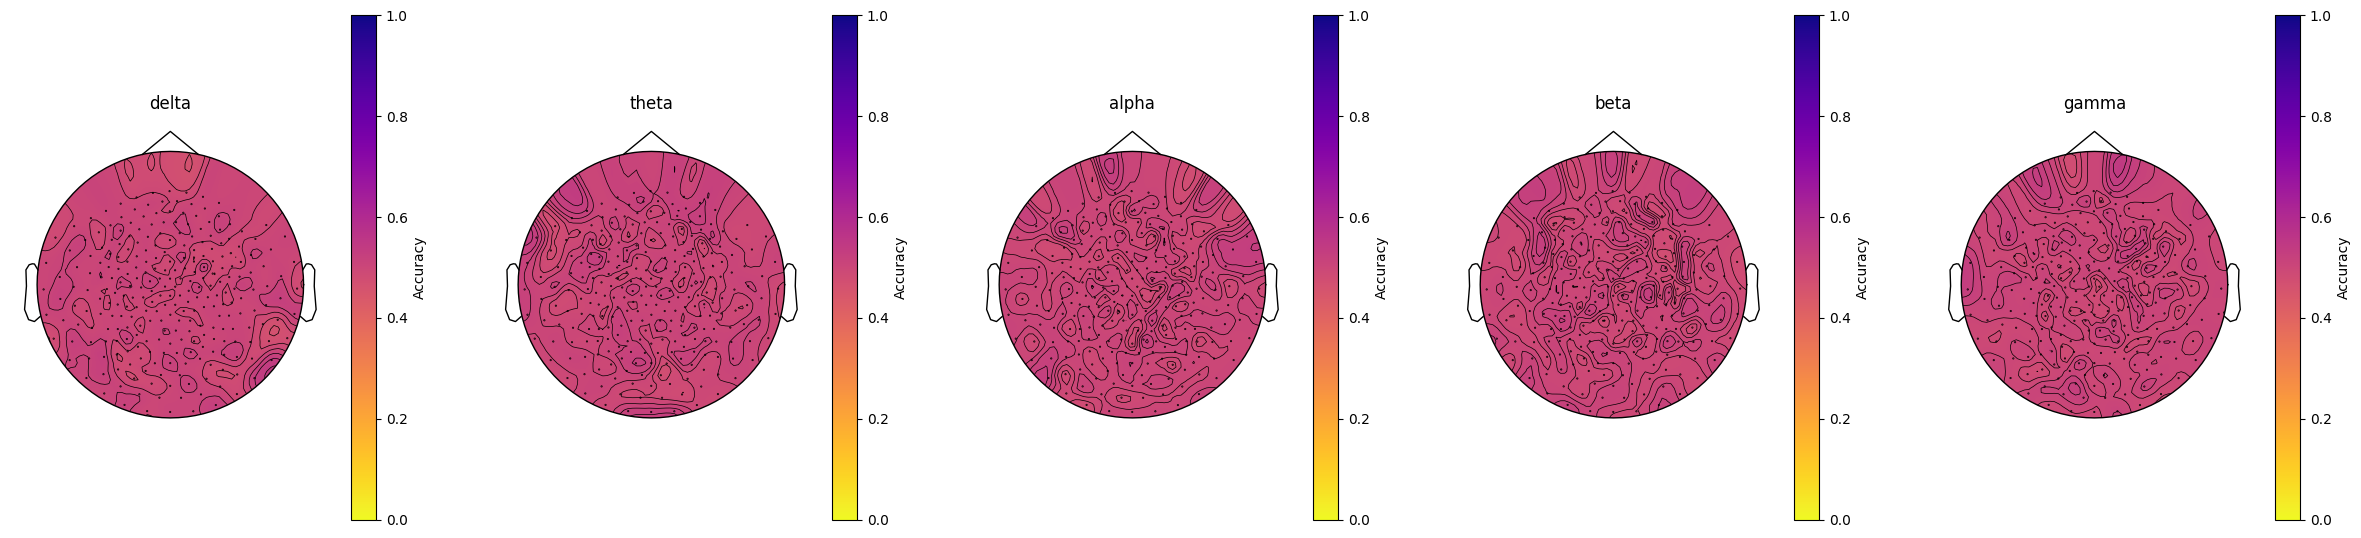

In [21]:
task = 'LaughterActive'
subj_list = SUBJ_CLEAN

if task == 'LaughterActive':
    run_list = ACTIVE_RUN
elif task == 'LaughterPassive':
    run_list = PASSIVE_RUN

# Select what conditions to compute (str)
cond1 = 'LaughReal'
cond2 = 'LaughPosed'
conditions = cond1 + '-' + cond2
condition_list = [cond1, cond2]
    
tmin = 1.3
tmax = 1.5

print(tmin, tmax)
sub_name = 'all'
run_name = 'all'
tmin_name = str(int(tmin*1000))
tmax_name = str(int(tmax*1000))
stage = tmin_name + '-' + tmax_name
conditions = cond1 + '-' + cond2

plot_sf(sub_name, run_name, stage, conditions)

## SF ERPs

In [49]:
def plot_sf_erp(sub_name, run_name, times, conditions) :
    ######## PLOT TOPOMAPS ########

    # check if PATH exists, if not, create it
    if not os.path.isdir(FIG_PATH + 'ml/erp/'):
        os.mkdir(FIG_PATH + 'ml/erp/')
        print("Flder created at : {}".format(FIG_PATH + 'ml/erp/'))
    else:
        print("{} already exists.".format(FIG_PATH + 'ml/erp/'))
        
    ####### Set up pdf to save figures ######
    filename = os.path.join(FIG_PATH, 'ml','erp',
                             'sub-{}_task-{}_run-{}_cond-{}_meas-sf-{}.png'.format(sub_name, task, 
                                                                                    run_name, conditions,
                                                                                    'topomaps-erp-DA'))
    #pdf = PdfPages(FIG_PATH + filename)
    
    # Load one epoch for channel info
    _, path_epochs = get_bids_file(RESULT_PATH, task=task, subj='01', stage="AR_epo")
    epochs = mne.read_epochs(path_epochs, verbose=None)
    

    min_list = []
    max_list = []
    for i, (tmin, tmax) in enumerate(times): 
        stage = str(tmin) + '-' + str(tmax)

        save_scores = RESULT_PATH + 'meg/reports/sub-all/ml/erp/sub-{}_task-{}_run-{}_cond-{}_meas-sf-{}_{}.pkl'.format(sub_name, task, 
                                                                                                                        run_name, conditions,

                                                                                                                        'scores-rdm_forest', stage)
     
        with open(save_scores, 'rb') as f:
            all_scores = pickle.load(f)

        minimum = np.min(all_scores)
        min_list.append(minimum)

        maximum = np.max(all_scores)
        max_list.append(maximum)

    # initialize figure
    fig, ax_topo = plt.subplots(1, len(times), figsize=(30, 5))
    
    for i, (tmin, tmax) in enumerate(times): 
        print(tmin, tmax)
        #row = i // 4  # Integer division to get the row
        #col = i % 4   # Modulus to get the column
        vmin = min(min_list)
        vmax = max(max_list)
        
        stage = str(tmin) + '-' + str(tmax)

                
        # Load data
        save_scores = RESULT_PATH + 'meg/reports/sub-all/ml/erp/sub-{}_task-{}_run-{}_cond-{}_meas-sf-{}_{}.pkl'.format(sub_name, task, 
                                                                                                                        run_name, conditions,

                                                                                                                        'scores-rdm_forest', stage)
        with open(save_scores, 'rb') as f:
            all_scores = pickle.load(f)
        
        #vmin = np.min(all_scores)
        #vmax = np.max(all_scores)

        img, _ = mne.viz.plot_topomap(all_scores, epochs.info, axes=ax_topo[i], show=False, 
                                cmap='plasma_r', extrapolate='head',
                                sphere=(0, 0.0, 0, 0.19),vlim=(0.5, 1))
        
        title = 'Time : ' + str(tmin) + '-' + str(tmax)
        ax_topo[i].set_title(title)    
        
        # TODO : put the colorbar on the right
        #cbar = plt.colorbar(
        #    ax=ax_topo[i], shrink=0.2, orientation='vertical', mappable=img,)

        #cbar.set_label('Accuracy')
        fig.subplots_adjust(right=0.8)
        cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
        fig.colorbar(img, cax=cbar_ax)
        cbar_ax.set_label('Accuracy')
            
    print('Save figure')
    #plt.savefig(pdf, format='pdf') 
    plt.show()
                             
#pdf.close()


[[700, 750], [750, 800], [800, 850], [850, 900], [900, 950]]
/home/claraelk/scratch/laughter_data/results/meg/reports/figures/ml/erp/ already exists.
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-01/sub-01_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
296 matching events found
No baseline correction applied
0 projection items activated
700 750
750 800
800 850
850 900
900 950
Save figure


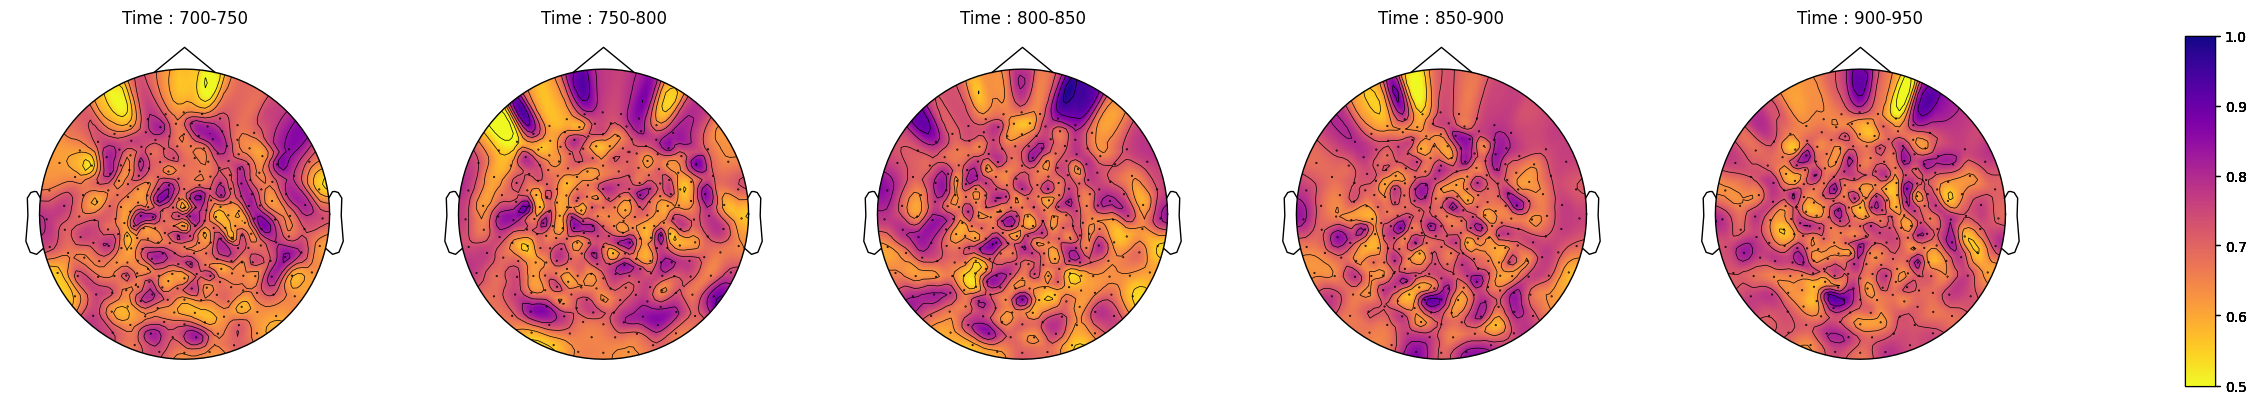

In [50]:
task = 'LaughterActive'
subj_list = SUBJ_CLEAN
times = []

# Select what conditions to compute (str)
cond1 = 'LaughReal'
cond2 = 'LaughPosed'
conditions = cond1 + '-' + cond2
condition_list = [cond1, cond2]

tmin = 700
tmax = 750

while tmax <= 950 : 
    times.append([tmin, tmax])
    tmin += 50
    tmax += 50
    
    #tmin = round(tmin, 2)
    #tmax = round(tmax, 2)

print(times)

sub_name = 'all'
run_name = 'all'

conditions = cond1 + '-' + cond2
plot_sf_erp(sub_name, run_name, times, conditions)